<a href="https://colab.research.google.com/github/Ebasurtos/AHPC/blob/main/TAREA3_HPC_Grupo2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

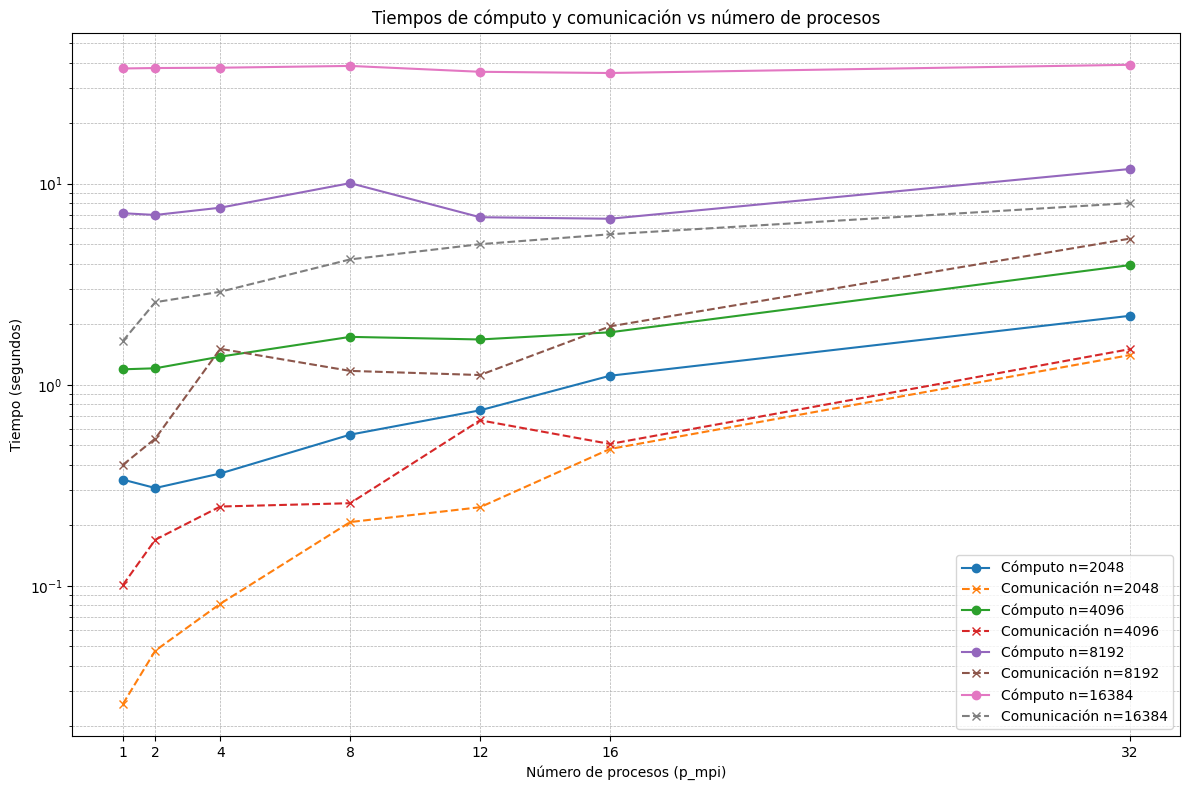

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir los datos en un diccionario
data = {
    "p_mpi": [1,2,4,8,12,16,32, 1,2,4,8,12,16,32, 1,2,4,8,12,16,32, 1,2,4,8,12,16,32],
    "n": [2048]*7 + [4096]*7 + [8192]*7 + [16384]*7,
    "time_computo": [0.3374,0.3064,0.3619,0.5645,0.7460,1.1083,2.2009,
                     1.193,1.2071,1.3793,1.7297,1.6791,1.8226,3.9335,
                     7.129,6.9863,7.5922,10.0589,6.8080,6.6901,11.8243,
                     37.3945,37.5833,37.7205,38.5,36.0,35.5,39.0],
    "time_comunicacion": [0.0258,0.0476,0.0814,0.2075,0.2459,0.4792,1.4033,
                          0.1008,0.1695,0.2479,0.2575,0.6656,0.5075,1.5023,
                          0.3993,0.5399,1.5084,1.1717,1.1174,1.9505,5.3259,
                          1.6485,2.5724,2.8991,4.2,5,5.6,8]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Lista de tamaños de matriz
matrices = df['n'].unique()

# Graficar
plt.figure(figsize=(12,8))
for n in matrices:
    df_n = df[df['n'] == n]
    plt.plot(df_n['p_mpi'], df_n['time_computo'], marker='o', label=f'Cómputo n={n}')
    plt.plot(df_n['p_mpi'], df_n['time_comunicacion'], marker='x', linestyle='--', label=f'Comunicación n={n}')

plt.xlabel('Número de procesos (p_mpi)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempos de cómputo y comunicación vs número de procesos')
plt.xticks(df['p_mpi'].unique())
plt.yscale('log')  # Escala logaritmica para mejor visualización
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


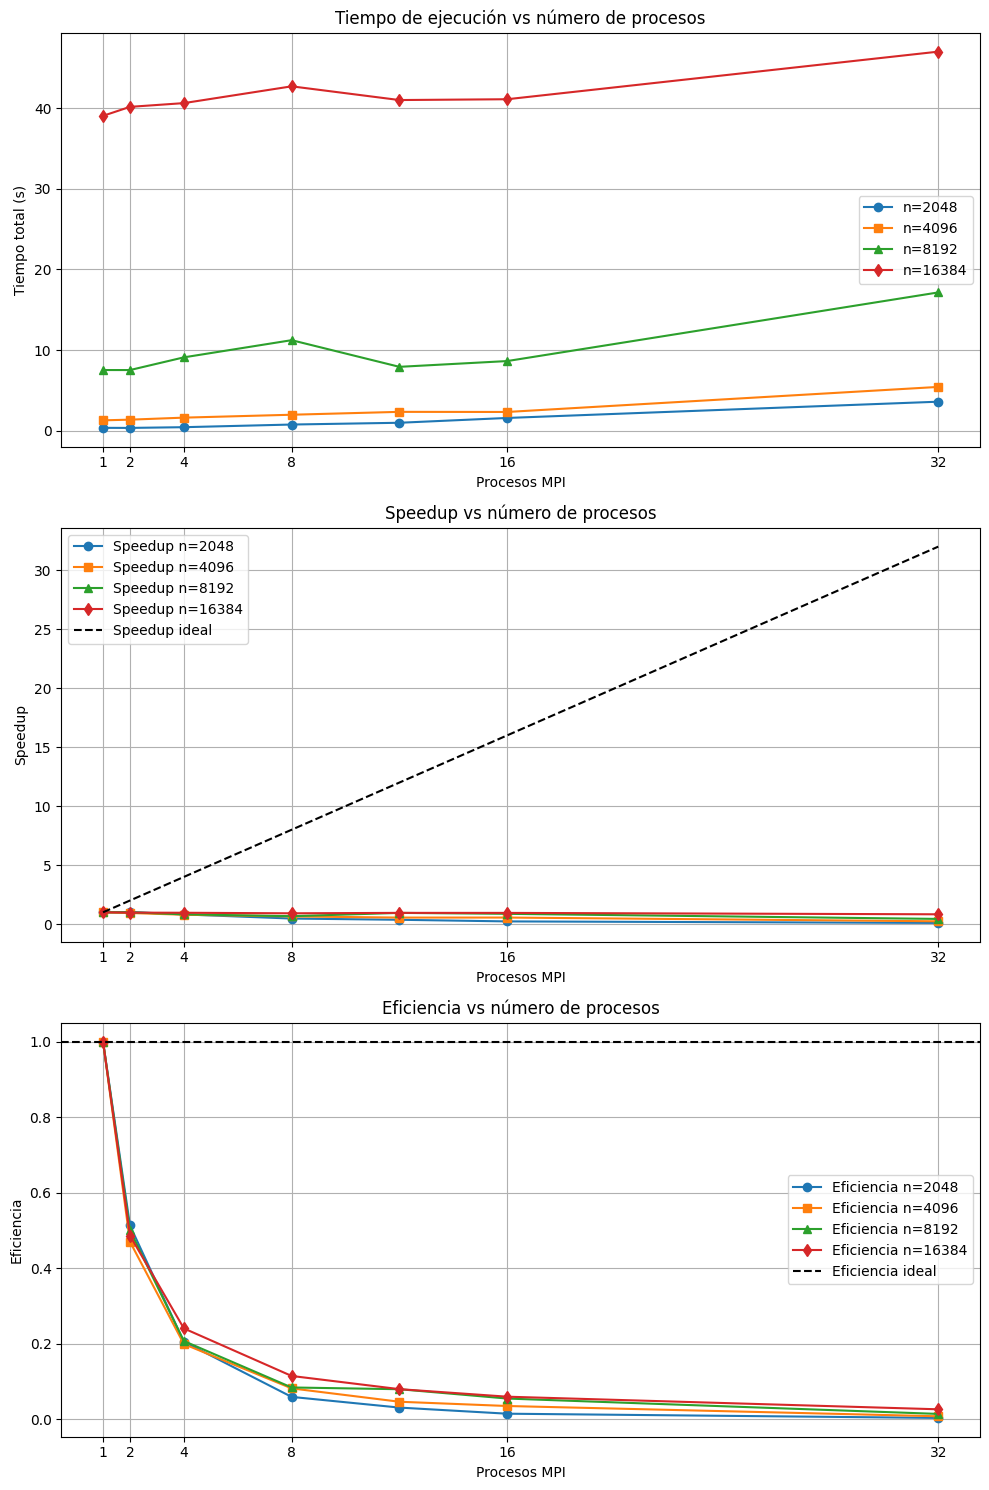

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    "p_mpi": [1,2,4,8,12,16,32, 1,2,4,8,12,16,32, 1,2,4,8,12,16,32, 1,2,4,8,12,16,32],
    "n": [2048]*7 + [4096]*7 + [8192]*7 + [16384]*7,
    "time_computo": [0.3374,0.3064,0.3619,0.5645,0.7460,1.1083,2.2009,
                     1.193,1.2071,1.3793,1.7297,1.6791,1.8226,3.9335,
                     7.129,6.9863,7.5922,10.0589,6.8080,6.6901,11.8243,
                     37.3945,37.5833,37.7205,38.5,36.0,35.5,39.0],
    "time_comunicacion": [0.0258,0.0476,0.0814,0.2075,0.2459,0.4792,1.4033,
                          0.1008,0.1695,0.2479,0.2575,0.6656,0.5075,1.5023,
                          0.3993,0.5399,1.5084,1.1717,1.1174,1.9505,5.3259,
                          1.6485,2.5724,2.8991,4.2,5,5.6,8]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo total
df['time_total'] = df['time_computo'] + df['time_comunicacion']

# Inicializar columnas de speedup y eficiencia
df['speedup'] = 0.0
df['eficiencia'] = 0.0

# Calcular speedup y eficiencia por tamaño de matriz
for n in df['n'].unique():
    subset = df[df['n'] == n]
    T1 = subset[subset['p_mpi'] == 1]['time_total'].values[0]
    df.loc[df['n'] == n, 'speedup'] = T1 / subset['time_total']
    df.loc[df['n'] == n, 'eficiencia'] = df.loc[df['n'] == n, 'speedup'] / subset['p_mpi']

# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sizes = df['n'].unique()
markers = ['o','s','^','d']

# Gráfico de tiempo de ejecución
for i, n in enumerate(sizes):
    subset = df[df['n'] == n]
    axs[0].plot(subset['p_mpi'], subset['time_total'], marker=markers[i], label=f'n={n}')
axs[0].set_title('Tiempo de ejecución vs número de procesos')
axs[0].set_xlabel('Procesos MPI')
axs[0].set_ylabel('Tiempo total (s)')
axs[0].set_xticks([1,2,4,8,16,32])
axs[0].grid(True)
axs[0].legend()

# Gráfico de speedup con referencia ideal
for i, n in enumerate(sizes):
    subset = df[df['n'] == n]
    axs[1].plot(subset['p_mpi'], subset['speedup'], marker=markers[i], label=f'Speedup n={n}')
# Línea de speedup ideal
axs[1].plot([1,2,4,8,16,32], [1,2,4,8,16,32], 'k--', label='Speedup ideal')
axs[1].set_title('Speedup vs número de procesos')
axs[1].set_xlabel('Procesos MPI')
axs[1].set_ylabel('Speedup')
axs[1].set_xticks([1,2,4,8,16,32])
axs[1].grid(True)
axs[1].legend()

# Gráfico de eficiencia con referencia ideal
for i, n in enumerate(sizes):
    subset = df[df['n'] == n]
    axs[2].plot(subset['p_mpi'], subset['eficiencia'], marker=markers[i], label=f'Eficiencia n={n}')
# Línea de eficiencia ideal (100%)
axs[2].axhline(1.0, color='k', linestyle='--', label='Eficiencia ideal')
axs[2].set_title('Eficiencia vs número de procesos')
axs[2].set_xlabel('Procesos MPI')
axs[2].set_ylabel('Eficiencia')
axs[2].set_xticks([1,2,4,8,16,32])
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()
